In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/nagapatinam/milknew.csv")

In [ ]:
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


In [ ]:
df.shape

(1059, 8)

In [ ]:
df.dtypes

pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Grade          object
dtype: object

In [ ]:
df.isna().values.any()

False

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<ipython-input-29-afb2b4e09bbc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.corr())


<Axes: >

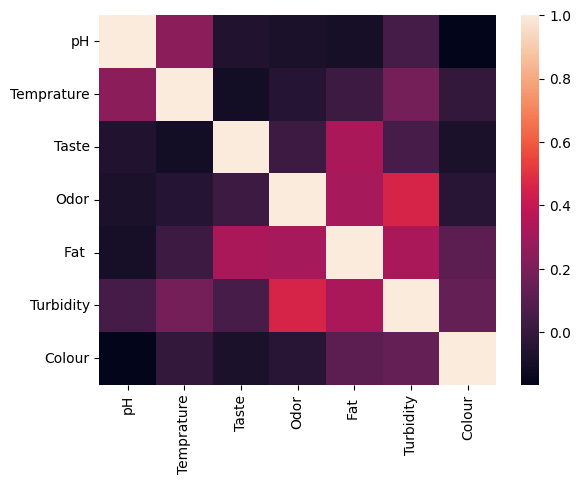

In [ ]:
sns.heatmap(data=df.corr())

In [ ]:
df['Grade'].value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

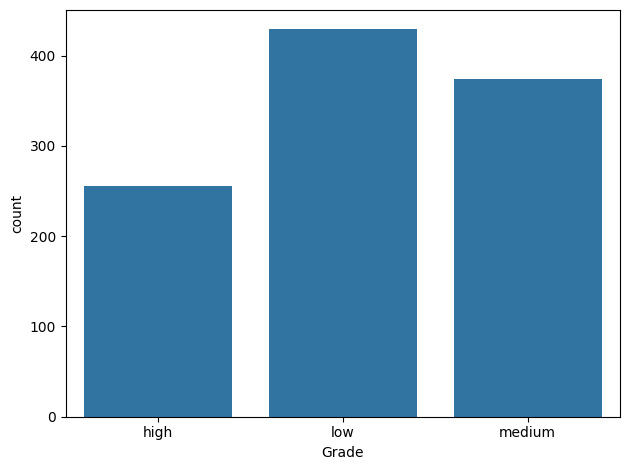

In [ ]:
sns.countplot(data=df, x='Grade')
plt.tight_layout()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
X=df.drop(columns='Grade')
X.head(10)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
0,6.6,35,1,0,1,0,254
1,6.6,36,0,1,0,1,253
2,8.5,70,1,1,1,1,246
3,9.5,34,1,1,0,1,255
4,6.6,37,0,0,0,0,255
5,6.6,37,1,1,1,1,255
6,5.5,45,1,0,1,1,250
7,4.5,60,0,1,1,1,250
8,8.1,66,1,0,1,1,255
9,6.7,45,1,1,0,0,247


In [ ]:
y=df['Grade']
y.head()

0      high
1      high
2       low
3       low
4    medium
Name: Grade, dtype: object

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [ ]:
print('Training Dataset')
print(X_train.shape)
print(y_train.shape)
print()
print('Testing Dataset')
print(X_test.shape)
print(y_test.shape)
print()

Training Dataset
(709, 7)
(709,)

Testing Dataset
(350, 7)
(350,)



In [ ]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(random_state=0)


In [ ]:
rfc.fit(X_train, y_train)


RandomForestClassifier(random_state=0)

In [ ]:
y_pred = rfc.predict(X_test)
accuracy_rfc =accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score of rfc: ',accuracy_rfc )

Model accuracy score of rfc:  0.9971428571428571


In [ ]:
from sklearn.metrics import confusion_matrix

cm_rfc = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm_rfc)

Confusion matrix

 [[ 86   0   0]
 [  1 127   0]
 [  0   0 136]]


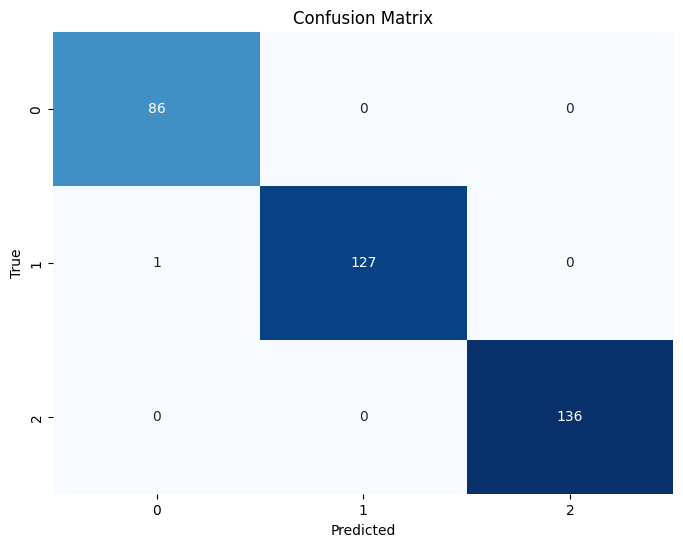

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rfc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        high       0.99      1.00      0.99        86
         low       1.00      0.99      1.00       128
      medium       1.00      1.00      1.00       136

    accuracy                           1.00       350
   macro avg       1.00      1.00      1.00       350
weighted avg       1.00      1.00      1.00       350



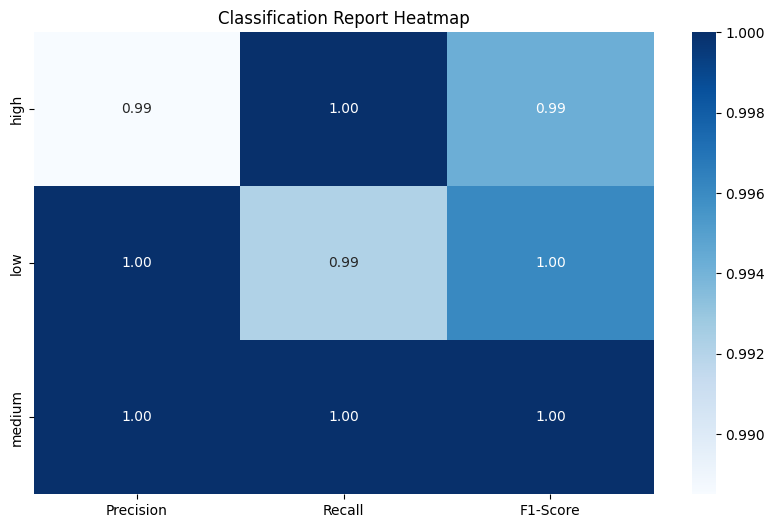

In [ ]:
# Plotting a heatmap for precision, recall, and F1-score
class_report = classification_report(y_test, y_pred, output_dict=True)
class_names = [str(label) for label in class_report.keys() if label not in ['accuracy', 'macro avg', 'weighted avg']]

# Extract precision, recall, and F1-score for each class
heatmap_data = [[class_report[class_name]['precision'], class_report[class_name]['recall'], class_report[class_name]['f1-score']] for class_name in class_names]

# Create a heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", xticklabels=['Precision', 'Recall', 'F1-Score'], yticklabels=class_names, cmap='Blues')
plt.title('Classification Report Heatmap')
plt.show()

In [ ]:
# import SVC classifier
from sklearn.svm import SVC


# instantiate classifier with default hyperparameters
svc=SVC()


In [ ]:
# fit classifier to training set
svc.fit(X_train,y_train)


SVC()

In [ ]:
# make predictions on test set
y_pred=svc.predict(X_test)
accuracy_svc=accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score of svc: ',accuracy_svc)

Model accuracy score of svc:  0.4857142857142857


In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm_svc = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm_svc)

Confusion matrix

 [[  0  61  25]
 [  0 118  10]
 [  0  84  52]]


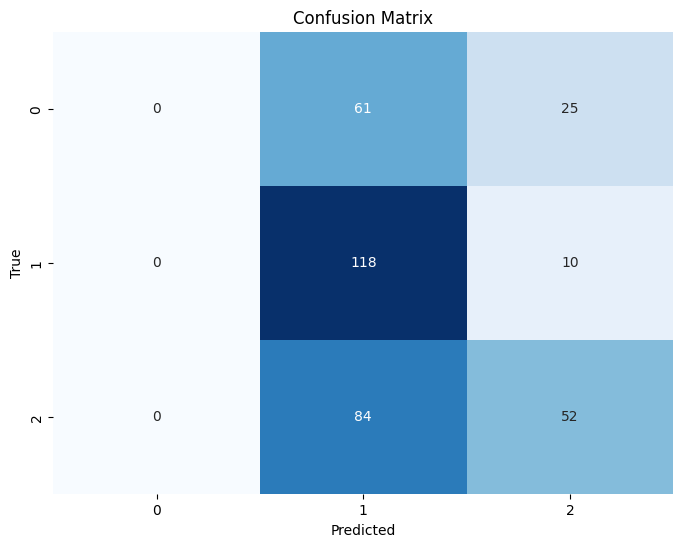

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        high       0.00      0.00      0.00        86
         low       0.45      0.92      0.60       128
      medium       0.60      0.38      0.47       136

    accuracy                           0.49       350
   macro avg       0.35      0.43      0.36       350
weighted avg       0.40      0.49      0.40       350



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


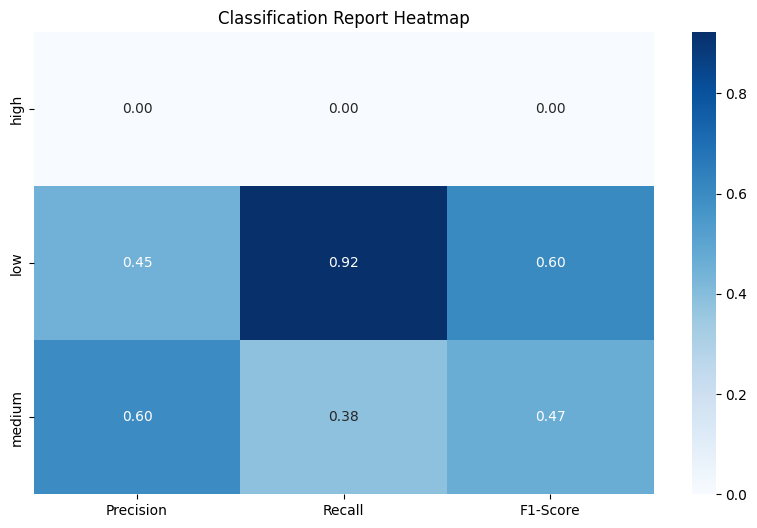

In [ ]:
# Plotting a heatmap for precision, recall, and F1-score
class_report = classification_report(y_test, y_pred, output_dict=True)
class_names = [str(label) for label in class_report.keys() if label not in ['accuracy', 'macro avg', 'weighted avg']]

# Extract precision, recall, and F1-score for each class
heatmap_data = [[class_report[class_name]['precision'], class_report[class_name]['recall'], class_report[class_name]['f1-score']] for class_name in class_names]

# Create a heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", xticklabels=['Precision', 'Recall', 'F1-Score'], yticklabels=class_names, cmap='Blues')
plt.title('Classification Report Heatmap')
plt.show()

In [ ]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model with criterion gini index

dtc = DecisionTreeClassifier(criterion='gini', random_state=0)
# fit the model
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred = dtc.predict(X_test)
accuracy_dtc = accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.metrics import accuracy_score

print('Model accuracy score DTC: ',accuracy_dtc)

Model accuracy score DTC:  0.9942857142857143


In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm_dtc = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm_dtc)

Confusion matrix

 [[ 85   0   1]
 [  1 127   0]
 [  0   0 136]]


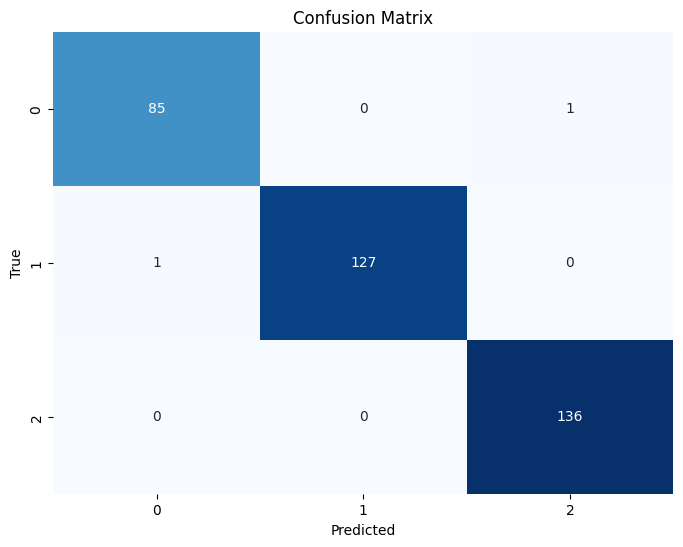

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dtc, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        high       0.99      0.99      0.99        86
         low       1.00      0.99      1.00       128
      medium       0.99      1.00      1.00       136

    accuracy                           0.99       350
   macro avg       0.99      0.99      0.99       350
weighted avg       0.99      0.99      0.99       350



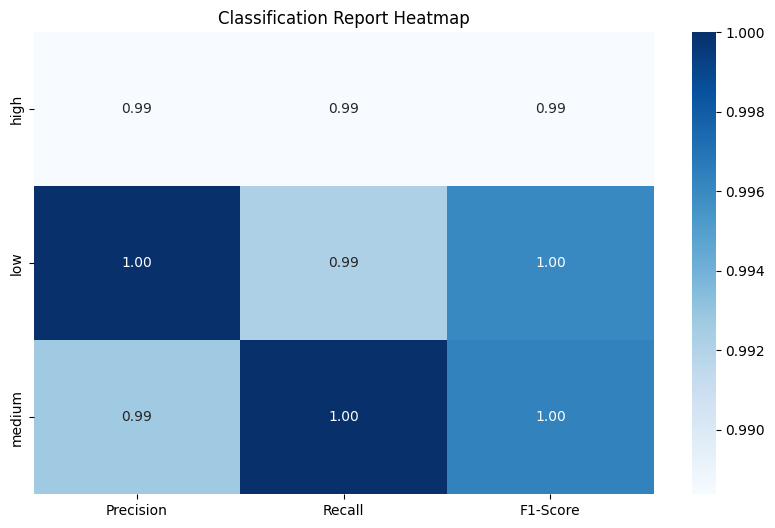

In [ ]:
# Plotting a heatmap for precision, recall, and F1-score
class_report = classification_report(y_test, y_pred, output_dict=True)
class_names = [str(label) for label in class_report.keys() if label not in ['accuracy', 'macro avg', 'weighted avg']]

# Extract precision, recall, and F1-score for each class
heatmap_data = [[class_report[class_name]['precision'], class_report[class_name]['recall'], class_report[class_name]['f1-score']] for class_name in class_names]

# Create a heatmap
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", xticklabels=['Precision', 'Recall', 'F1-Score'], yticklabels=class_names, cmap='Blues')
plt.title('Classification Report Heatmap')
plt.show()